# Demo 1

From <https://github.com/tyarkoni/pliers#example-the-first>.

In [15]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "img/obama.jpg", width=400)

In [2]:
from pliers.extractors import GoogleVisionAPIFaceExtractor
ext = GoogleVisionAPIFaceExtractor()

obama = ext.transform('img/obama.jpg').to_df()
obama

,onset,duration,landmark_LEFT_EYE_RIGHT_CORNER_z,landmark_LEFT_EYE_RIGHT_CORNER_x,landmark_LEFT_EYE_RIGHT_CORNER_y,fdBoundingPoly_vertex1_y,landmark_MIDPOINT_BETWEEN_EYES_z,landmark_MIDPOINT_BETWEEN_EYES_x,landmark_MIDPOINT_BETWEEN_EYES_y,tiltAngle,...,landmark_RIGHT_OF_LEFT_EYEBROW_z,joyLikelihood,landmark_RIGHT_OF_LEFT_EYEBROW_x,landmark_RIGHT_OF_LEFT_EYEBROW_y,landmark_RIGHT_OF_RIGHT_EYEBROW_z,landmark_RIGHT_OF_RIGHT_EYEBROW_x,landmark_RIGHT_OF_RIGHT_EYEBROW_y,boundingPoly_vertex4_x,boundingPoly_vertex4_y,landmark_RIGHT_EYE_LEFT_CORNER_y
0,None,None,-0.051046,186.25365,211.77217,112,-25.619604,219.56862,203.68555,-2.058331,...,-23.860262,VERY_LIKELY,191.6638,184.7009,7.464142,317.03247,181.90614,34,444,205.67786


### Is he angry?

In [3]:
print(obama['angerLikelihood'])

0    VERY_UNLIKELY
Name: angerLikelihood, dtype: object


### Is he joyful?

In [4]:
print(obama['joyLikelihood'])

0    VERY_LIKELY
Name: joyLikelihood, dtype: object


How about the new guy?

In [6]:
Image(url="img/trump.jpg", width=400)

In [5]:
ext = GoogleVisionAPIFaceExtractor()
trump = ext.transform('img/trump.jpg').to_df()

### Is he angry?

In [6]:
print(trump['angerLikelihood'])

0    LIKELY
Name: angerLikelihood, dtype: object


### Is he joyful

In [7]:
print(trump['joyLikelihood'])

0    VERY_UNLIKELY
Name: joyLikelihood, dtype: object


## Demo 2

In this demo, we'll import some sound stimuli and run a speech to text conversion program over them before returning the results. These sounds are from [this](http://doi.org/10.17910/B7.248) volume on [Databrary](http://databrary.org).

<img src="https://nyu.databrary.org/volume/248/thumb?size"/ width=400px>

[Sound stimulus](snd/peep-I-neu-chk.wav)

In [8]:
import speech_recognition
from pliers.converters import IBMSpeechAPIConverter

ext_speech_IBM = IBMSpeechAPIConverter()
neu_chk_IBM = ext_speech_IBM.transform('snd/peep-I-neu-chk.wav')

Next, we'll print the onset and duration of the extracted speech stream for each word.

In [9]:
for ts in neu_chk_IBM:
    print(str(ts.onset) + "\t" + str(ts.duration) + "\t" + ts.text)

1.15	0.55	hi
2.4	0.14	the
2.54	0.5	checkbooks
3.04	0.44	gone
4.54	0.21	you
4.75	0.26	took
5.01	0.18	it
6.2	0.14	I
6.34	0.28	don't
6.62	0.21	have
6.83	0.2	it
8.72	0.21	you
8.93	0.24	had
9.17	0.11	it
9.28	0.54	last
10.83	0.23	it's
11.06	0.29	just
11.35	0.17	not
11.52	0.46	here
12.93	0.16	you'll
13.09	0.2	have
13.29	0.13	to
13.42	0.34	find
13.76	0.16	it


Would you like to see a frequency spectrum of these data?

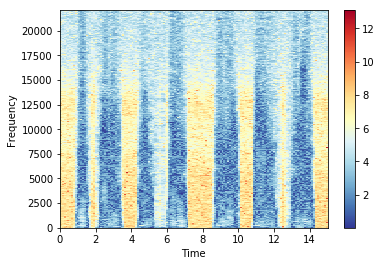

In [10]:
from pliers.extractors import STFTAudioExtractor
import matplotlib

ext = STFTAudioExtractor(freq_bins=10, spectrogram=True)

result = ext.transform('snd/peep-I-neu-chk.wav')
print(result)

Let's try another sound, just for fun. 

[Another sound](snd/peep-I-hap-tlk.wav)

In [11]:
ext_speech_IBM = IBMSpeechAPIConverter()
hap_tlk_IBM = ext_speech_IBM.transform('snd/peep-I-hap-tlk.wav')

In [12]:
for ts in hap_tlk_IBM:
    print(str(ts.onset) + "\t" + str(ts.duration) + "\t" + ts.text)

0.96	0.45	sorry
1.41	0.13	you're
1.54	0.58	tired
2.84	0.28	we
3.12	0.21	should
3.33	0.51	talk
4.73	0.32	about
5.05	0.3	lots
5.35	0.1	of
5.45	0.54	things
6.97	0.6	money
7.96	0.12	the
8.08	0.66	weekend
9.7	0.51	fine
10.54	0.14	we
10.68	0.14	will
10.82	0.33	talk
11.15	0.51	now
12.64	0.73	okay
13.45	0.31	never
13.76	0.48	mind


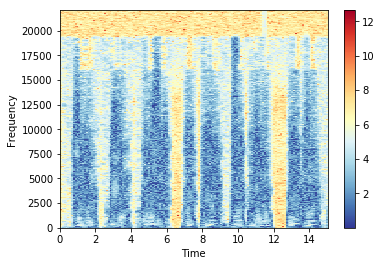

In [13]:
result = ext.transform('snd/peep-I-hap-tlk.wav')
print(result)

Slick, eh? See the `pliers` [documentation](http://tyarkoni.github.io/pliers/index.html) for more goodness.
